<a href="https://colab.research.google.com/github/Karampruthi/CE888-Data-Science-Decision-making/blob/main/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [3]:
def bootstrap_mean(x, sample_size, n_bootstraps):
  mean_list = []
  for i in range(n_bootstraps):
    sample = np.random.choice(x,sample_size)
    mean = np.mean(sample)
    mean_list.append(mean)
  lower, upper = np.percentile(mean_list,[2.5,97.5])
  data_mean = sum(mean_list)/len(mean_list)

  return data_mean, lower, upper


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

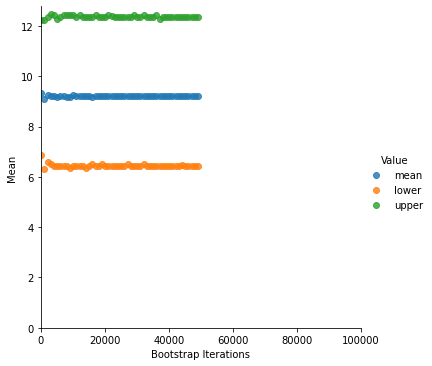

In [4]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
# Bootstrap to find CI of mean
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  mean_list = []
  for i in range(n_bootstraps):
    sam = np.random.choice(sample,sample_size)
    mean = np.mean(sam) 
    mean_list.append(mean)
  lower, upper = np.percentile(mean_list,[((100-ci)/2),((100+ci)/2)])
  data_mean = np.mean(mean_list)

  return data_mean, lower, upper

In [6]:
# Bootstrap to find CI of std
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
  std_list = []
  for i in range(n_bootstraps):
    sam = np.random.choice(sample,sample_size)
    std = np.std(sam) 
    std_list.append(std)
  lower, upper = np.percentile(std_list,[((100-ci)/2),((100+ci)/2)])
  data_std = np.std(std_list)

  return data_std, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

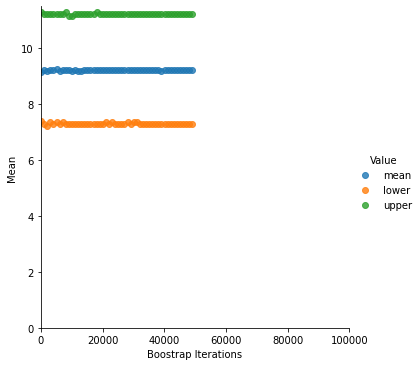

In [7]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

# sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


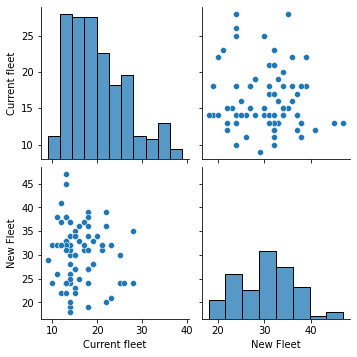

In [8]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df_vec = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
sns.pairplot(df_vec)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 60000.0)

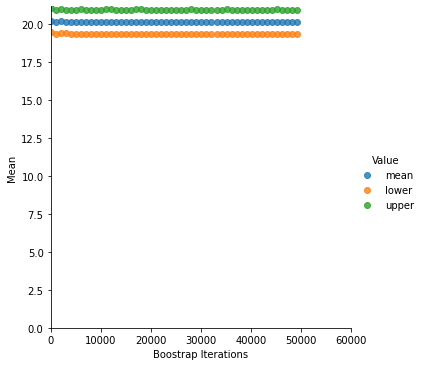

In [9]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(df_vec['Current fleet'], df_vec['Current fleet'].shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 60000)

# sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 60000.0)

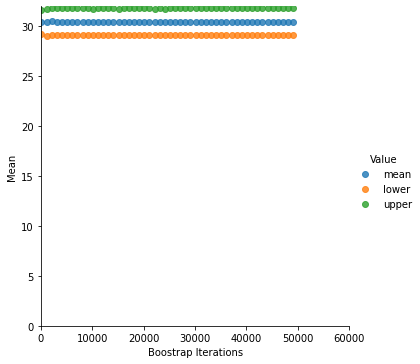

In [10]:
data = df_vec['New Fleet'][0:79]
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 60000)

# sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [11]:
df_vec.describe()

,Current fleet,New Fleet
count,249.000000,79.000000
mean,20.144578,30.481013
std,6.414699,6.107710
min,9.000000,18.000000
25%,15.000000,25.500000
50%,19.000000,32.000000
75%,24.000000,34.000000
max,39.000000,47.000000


P-Test

In [12]:
def permut_test(sample1, sample2, n_permutations):
    concat = np.concatenate((sample1,sample2))
    old_dif = np.mean(sample2) - np.mean(sample1)

    dif =[]
    for i in range(n_permutations):
      perm = np.random.permutation(concat)
      pold = perm[:int(len(sample1))]
      pnew = perm[int(len(sample1)):]
      new_dif = np.mean(pnew) - np.mean(pold)
      dif.append(new_dif)
    pvalue = np.sum(dif > old_dif)/n_permutations
    return pvalue

In [13]:
permut_test(df_vec['Current fleet'].values,df_vec['New Fleet'][0:79].values,30000)

0.0

Voting_Data

In [14]:
import voting_data as vd

In [18]:
voting = pd.DataFrame([vd.dem_share_PA,vd.dem_share_OH]).T

voting = voting.rename(columns={0: "PA", 1: "OH"})

In [19]:
voting

,PA,OH
0,60.08,56.94
1,40.64,50.46
2,36.07,65.99
3,41.21,45.88
4,31.04,42.23
...,...,...
83,NaN,53.53
84,NaN,36.54
85,NaN,49.58
86,NaN,41.97


In [20]:
data.describe()

count    79.000000
mean     30.481013
std       6.107710
min      18.000000
25%      25.500000
50%      32.000000
75%      34.000000
max      47.000000
Name: New Fleet, dtype: float64

In [21]:
# pvalue of voting_data
permut_test(vd.dem_share_OH,vd.dem_share_PA,10000) 

0.2433

In [22]:
len(vd.dem_share_OH)

88

In [23]:
# The 95% confidence intervals for the means of the votes using 20000 bootstraps
bootstrap_mean_ci(vd.dem_share_PA,len(vd.dem_share_PA) , 20000, 95)

(45.456360044776126, 43.19693656716417, 47.86570895522387)

In [24]:
# The 80% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 
bootstrap_mean_ci(df_vec['New Fleet'][0:79], df_vec['New Fleet'][0:79].shape[0], 10000, 80)

(30.473721518987343, 29.620253164556964, 31.341772151898734)

In [25]:
# The 95% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 
bootstrap_mean_ci(df_vec['New Fleet'][0:79], df_vec['New Fleet'][0:79].shape[0], 10000, 95)

(30.47594810126582, 29.126582278481013, 31.860759493670887)

In [26]:
# The 90% confidence interval for the standard deviation of the customers dataset using 10000 iterations
bootstrap_std_ci(data,data.shape[0], 10000, 90)

(0.4500665233730463, 5.289002343796426, 6.770157045648693)

In [27]:
# The 73% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations
bootstrap_std_ci(df_vec['New Fleet'][0:79], df_vec['New Fleet'][0:79].shape[0], 10000, 73)

(0.4487333420821758, 5.503044268827701, 6.504569651283567)

In [28]:
df_vec.describe()

,Current fleet,New Fleet
count,249.000000,79.000000
mean,20.144578,30.481013
std,6.414699,6.107710
min,9.000000,18.000000
25%,15.000000,25.500000
50%,19.000000,32.000000
75%,24.000000,34.000000
max,39.000000,47.000000
